In [1]:
import folium
import geopandas as gpd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

In [2]:
gvi = gpd.read_file("/workspace/app/Green-View-Index/tokuyama/tokuyama_gvi/tokuyama_gvi.shp")
gvi.isna().sum()

point_id    0
pano_id     4
gvi         4
geometry    0
dtype: int64

In [3]:


# def gvi_to_color(gvi):
#     """
#     GVIの値を色にマッピングする関数。
#     茶色から緑、青緑までのグラデーションを使って色を決定します。
#     """
#     # 正規化：GVIの値を0から1の範囲にスケーリング
#     norm = mcolors.Normalize(vmin=0, vmax=100)

#     # カラーマップを作成（茶色から緑、青緑への線形グラデーション）
#     cmap = mcolors.LinearSegmentedColormap.from_list("CustomBrownGreen", ["#8B4513", "#9ACD32", "#66CDAA"])

#     # GVIの値をカラーにマッピング
#     rgba_color = cmap(norm(gvi))
#     # RGBA値を16進カラーコードに変換
#     hex_color = mcolors.to_hex(rgba_color)
#     return hex_color

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def gvi_to_color(gvi):
    """
    GVIの値を色にマッピングする関数。
    GVIが30を超えると青緑色、15以下は茶色、
    15から30の間はグラデーションで色を決定します。
    """
    # 正規化：GVIの値を0から1の範囲にスケーリング
    norm = mcolors.Normalize(vmin=0, vmax=100)

    # カラーマップを作成
    # 0-15: 茶色 (saddlebrown), 15-30: 緑へのグラデーション, 30+: 青緑色 (teal)
    cmap = mcolors.LinearSegmentedColormap.from_list(
        "BrownGreenTeal",
        [(0.0, "saddlebrown"), (0.15, "saddlebrown"), (0.3, "green"), (1.0, "teal")],  # 0  # 15  # 30  # 100
    )

    # GVIの値をカラーにマッピング
    rgba_color = cmap(norm(gvi))
    # RGBA値を16進カラーコードに変換
    hex_color = mcolors.to_hex(rgba_color)
    return hex_color

In [5]:
# 中心座標をデータの中心に設定
map_center = [gvi.geometry.y.mean(), gvi.geometry.x.mean()]
# Foliumマップを作成
m = folium.Map(location=map_center, zoom_start=15, tiles="cartodbdark_matter")

# データフレームをループして各ポイントを追加
for idx, row in gvi.iterrows():
    gvi_value = row["gvi"]
    # GVIの値がNaNの場合はスキップ
    if pd.isna(gvi_value):
        continue
    # GVIの値を色にマッピング
    color = gvi_to_color(gvi_value)
    # ポイントの座標を取得
    lat = row.geometry.y
    lon = row.geometry.x
    # FoliumのCircleを追加
    folium.Circle(
        location=[lat, lon],
        radius=20,  # 半径を適宜調整
        color=color,
        fill=True,
        stroke=False,
        fill_color=color,
        fill_opacity=1,
        popup=f"GVI: {gvi_value:.2f}",
    ).add_to(m)

# マップを表示
m

array([[<Axes: title={'center': 'gvi'}>]], dtype=object)

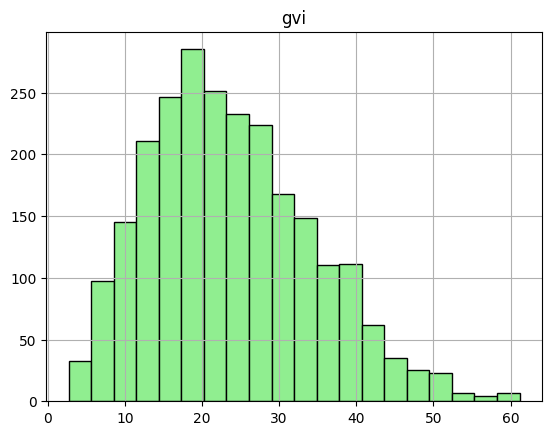

In [9]:
# 　ヒストグラムでGVIの分布を確認
gvi.hist(column="gvi", bins=20, color="lightgreen", edgecolor="black")